In [2]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2, hed
from skimage.filters import meijering, sato, frangi, hessian
import caer
from winsound import Beep
fq = 1500  # Set Frequency To 2500 Hertz
du = 600  # Set Duration To 1000 ms == 1 second
Beep(fq, du)

In [15]:

import ipywidgets as wd

def colorSpaces(img):
    rgb = caer.imread(img, rgb=True)
    hsv = caer.rgb_to_hsv(rgb)
    lab = caer.rgb_to_lab(rgb)
    hsl = cv2.cvtColor(rgb,cv2.COLOR_BGR2HLS)
    YBR = cv2.cvtColor(rgb,cv2.COLOR_BGR2YCR_CB)
    return rgb,hsv,lab,hsl,YBR

def edges(img):
    canny = cv2.Canny(img,100,200)
    return canny

@wd.interact(A=(0,4,1), cannyEdges=False, img=[('olivino', "olivino.jpg"), ('estilolitos', "estilolito.jpg"),\
                                          ("olivino serpentinizado","olivino_serpentina.jpg")])

def actualice(A=1, cannyEdges=False,img="olivino.jpg"):
    plt.figure(figsize=(12,9))
    colors = ["RGB", "HSV", "LAB", "HSL", "YBR"]
    if cannyEdges:
        plt.title(f"Bordes Canny Modelo Color: {colors[A]}")
        return plt.imshow(edges(colorSpaces(img)[A]))
    else:
        plt.title(f"Sección {img} Modelo Color: {colors[A]}")
        return plt.imshow(colorSpaces(img)[A])

interactive(children=(IntSlider(value=1, description='A', max=4), Checkbox(value=False, description='cannyEdge…

In [16]:
!explorer .

In [4]:
hedrgb = hed.hed(rgb)
Beep(fq, du)


In [ ]:
hedhsv = hed.hed(hsv)
Beep(fq, du)


In [1]:
hedlab = hed.hed(lab)
Beep(1000, du)

NameError: name 'hed' is not defined

In [ ]:


hed.graphImgsColor([rgb, hsv, lab], ["original (RGB)", "hsv", "lab"])
hed.graphImgsColor([cv2.Canny(rgb, 100, 200), cv2.Canny(hsv, 100, 200), cv2.Canny(lab, 100, 200)]\
                   , ["original (RGB)", "hsv", "lab"])
hed.graphImgsColor([cv2.Canny(rgb, 100, 200), cv2.Canny(hsv, 100, 200), cv2.Canny(lab, 100, 200)]\
                   , ["hed  (RGB)", "hed hsv", "hed lab"])
hed.graphImgsColor([hedrgb, hedhsv, hedlab], ["original (RGB)", "hsv", "lab"])
hed.graphImgsColor([cv2.Canny(hedrgb, 100, 200), cv2.Canny(hedhsv, 100, 200), cv2.Canny(hedlab, 100, 200)]\
                   , ["hed Canny (RGB)", "hed Canny hsv", "hed Canny lab"])
Beep(3e3, du)

In [4]:
imgCanny = hed.hed(image, apply_canny=True)
Beep(fq, du)

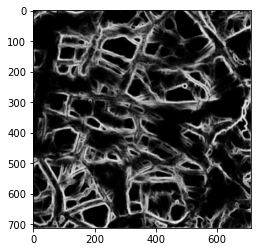

In [12]:
plt.imshow(img)

C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  """Entry point for launching an IPython kernel.


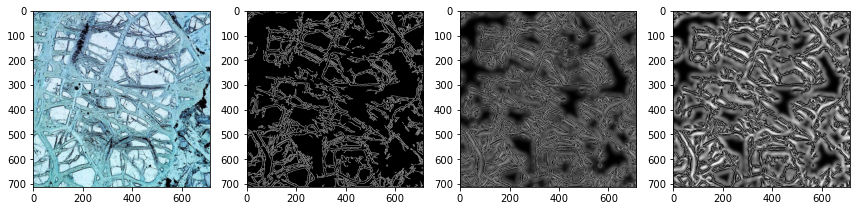

In [10]:
hed.graphImgs([image, imgCanny, sato(imgCanny), meijering(imgCanny)])

C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  


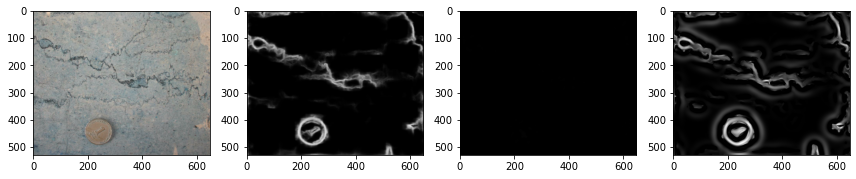

In [1]:
import hed, cv2
from skimage.filters import meijering, sato, frangi, hessian
from winsound import Beep
fq = 1500  # Set Frequency To 2500 Hertz
du = 600  # Set Duration To 1000 ms == 1 second
Beep(fq, du)
image = cv2.imread("estilolito.jpg", 1)
imageHED = hed.hed(image)
Beep(fq, du)
imageSato = sato(imageHED)
Beep(fq, du)
imageMeijering = meijering(imageHED)
Beep(fq, du)
hed.graphImgs([image, imageHED, sato(imageSato), meijering(imageMeijering)])
Beep(2000, du)

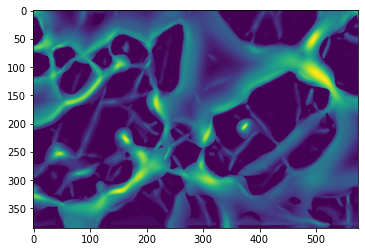

In [22]:
plt.imshow(meijering(cv2.imread("olivino.jpg", 0), sigmas=range(4,20,1)))

In [23]:
imagen = cv2.imread("olivino.jpg", 1)


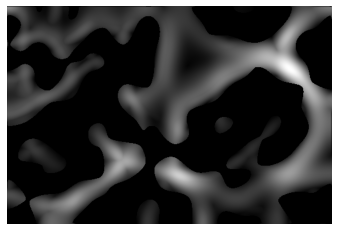

In [36]:
from celluloid import Camera
fig = plt.figure()
camera = Camera(fig)


for i in reversed(range(5,20,1)):
    if i == 1:
        plt.imshow(imagen[:,:,:])
        plt.axis("off")
        camera.snap()        
        plt.imshow(imagen[:,:,0])
        plt.axis("off")
        camera.snap()
    plt.imshow(meijering(imagen, sigmas=range(i-4,i,1)), cmap="rainbow")
    plt.axis("off")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)
for i in range(5,20,1):
    plt.imshow(meijering(imagen, sigmas=range(i,i+4,1)), cmap="rainbow")
    plt.axis("off")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)

animation = camera.animate()
animation.save("animaoli.gif")

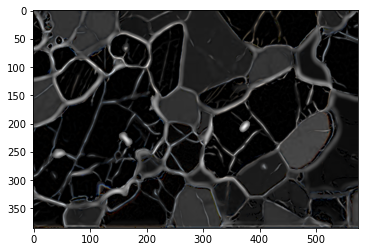

In [35]:
plt.imshow(meijering(imagen, sigmas=(1,5,2)))

In [25]:
from IPython.display import HTML
animation = camera.animate()
HTML(animation.to_html5_video())

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for i in reversed(range(5,20,1)):
    if i == 1:
        plt.imshow(imagen[:,:,0],cmap="rainbow")
        camera.snap()
    plt.imshow(meijering(imagen, sigmas=range(i-4,i,1)), cmap="rainbow")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)
for i in range(5,20,1):

    plt.imshow(meijering(imagen, sigmas=range(i,i+4,1)), cmap="rainbow")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)

animation = camera.animate()
animation.save("anima2.mp4")


In [ ]:
import numpy as np
import cv2 

img = cv2.imread("oli")

In [5]:
hed.graphImgs([image[:,:,-1], img], ["Original", "Con Filtro HED"])

NameError: name 'img' is not defined

In [5]:
!explorer .